# Changing R plot options in Jupyter

To use R with Jupyter, under the hood the service runs the IRKernel. This kernel communicates between R and the Jupyter service.

IRKernel allows you to specify different options for plotting. For example, you can change:

* whether to display images as SVG or PNG
* the plot size

## Changing the plot mimetype

The mimetype specifies how the plot returns from R to your browser. For example, the format can be SVG (Scalable vector graphics) or PNG (a bitmap image).

Not all browsers handle SVG display very well. For example, some versions of Internet Explorer render SVG very slowly, or not at all.

Thus it's a good idea to set the mimetype to "image/png" if you plan to use Internet Explorer.

### Using "image/png"

In [1]:
# Create a plot with some normally distributed data
library("ggplot2")
set.seed(42)
n <- 1000
p <- ggplot(data.frame(x = rnorm(n), y = rnorm(n)), aes(x=x, y=y)) + 
  geom_point(alpha = 0.25, size = 1, colour = "blue") +
  geom_density2d(colour = "red")

Warning message:
: package 'ggplot2' was built under R version 3.2.4

Now change the plot type to `image/png`

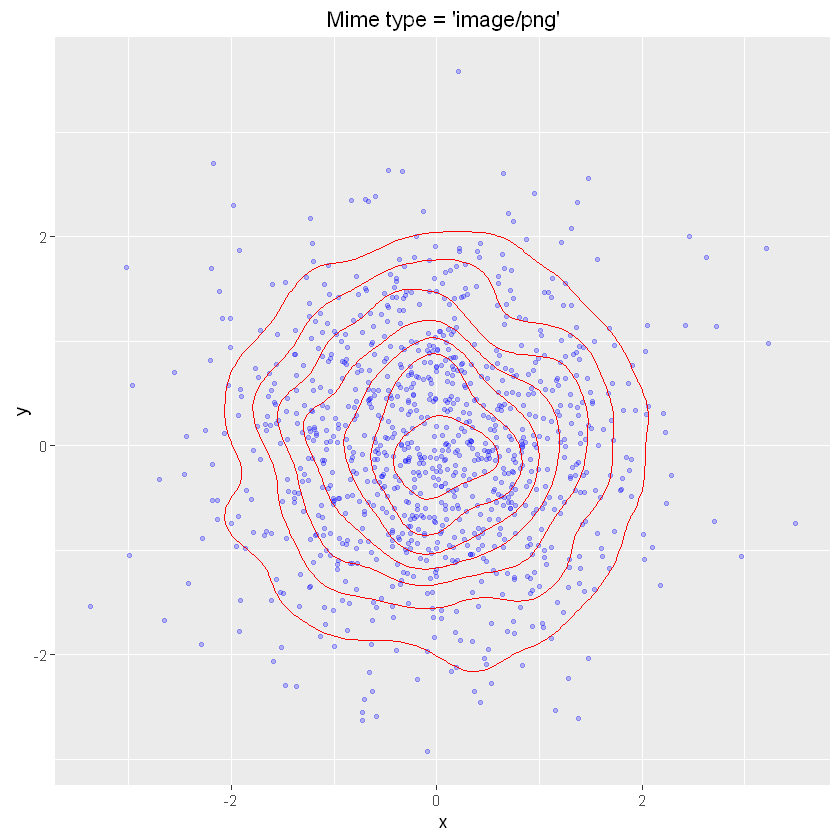

In [2]:
# Change mimetype to PNG
options(jupyter.plot_mimetypes = "image/png") 

p + ggtitle(sprintf("Mime type = '%s'", getOption("jupyter.plot_mimetypes")))

### Using image/svg+xml

Some browswers are very good at handling SVG plots. If you are running this notebook in a browser like Firefox or Chrome, then you can safely remove the comment in the next block of code to view the image using SVG.

If you are using Internet Explorer, your browser session might hang up. If you are using the Edge browser in Windows 10, then the plot should display, but it could take some time to render.

Proceed with caution!

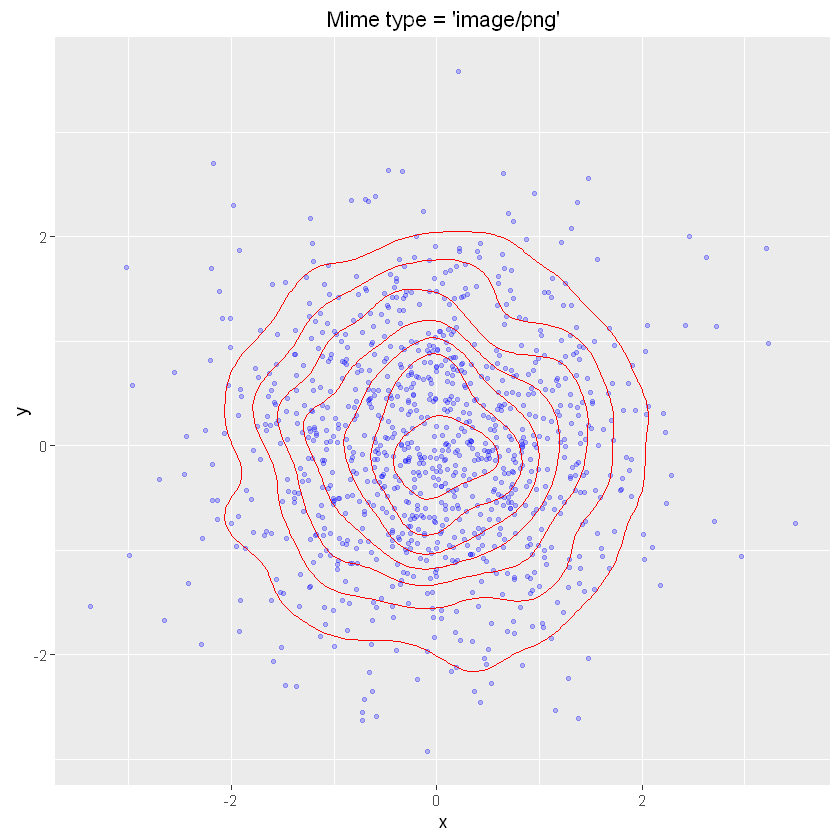

In [3]:
# Change mimetype to PNG

### Uncomment the next line if you are using a browser with good support for SVG graphics

# options(jupyter.plot_mimetypes = "image/svg+xml") 

p + ggtitle(sprintf("Mime type = '%s'", getOption("jupyter.plot_mimetypes")))

## Changing the plot size

You can change the plot size by setting the option `repr.plot.width` and `repr.plot.height`.

The `repr` package is part of the IRKernel (the machinery that connects Jupyter and R), and specifically handles representations of objects, including plots.

Try setting the plot width to 4, for a plot that fills only about half the available screen width:

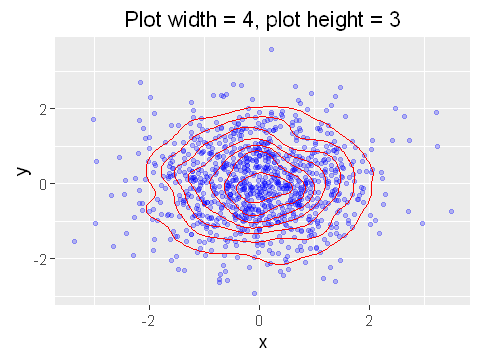

In [4]:
options(repr.plot.width = 4, repr.plot.height = 3)
p + ggtitle(sprintf(
    "Plot width = %s, plot height = %s", 
    getOption("repr.plot.width"),
    getOption("repr.plot.height")
))

Next, set the plot width to 8, i.e. double the previous width.

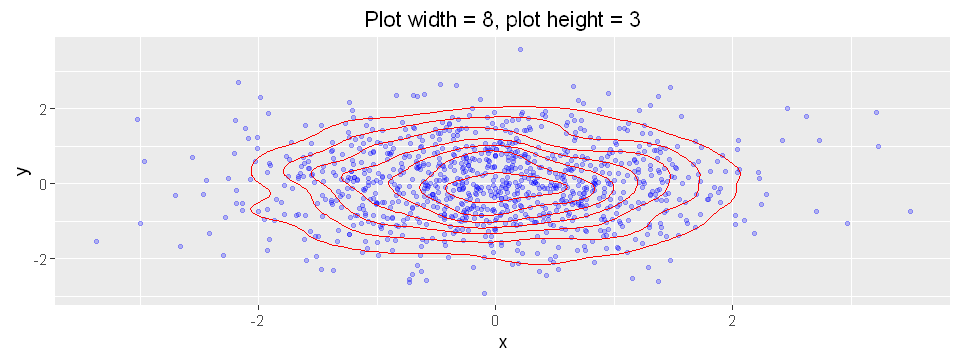

In [5]:
options(repr.plot.width = 8, repr.plot.height = 3)
p + ggtitle(sprintf(
    "Plot width = %s, plot height = %s", 
    getOption("repr.plot.width"),
    getOption("repr.plot.height")
))

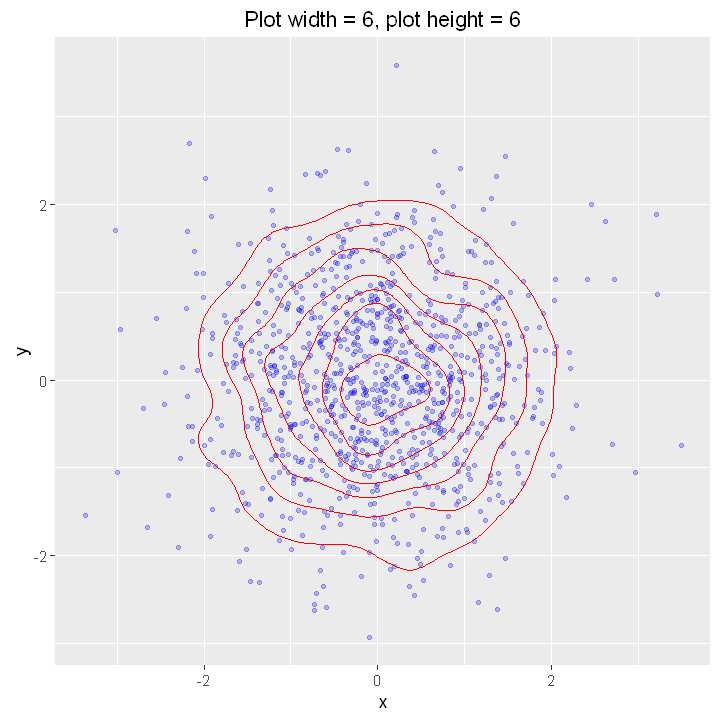

In [6]:
options(repr.plot.width = 6, repr.plot.height = 6)
p + ggtitle(sprintf(
    "Plot width = %s, plot height = %s", 
    getOption("repr.plot.width"),
    getOption("repr.plot.height")
))

## Jupyter only respects the last value of repr options in each cell

Note that you can only change the plot options once in each cell. The following example creates two identical plots, and attempts to set the width and height for each.

However, this **does not work**, as you can see from the output, where the two plots are clearly the same size.

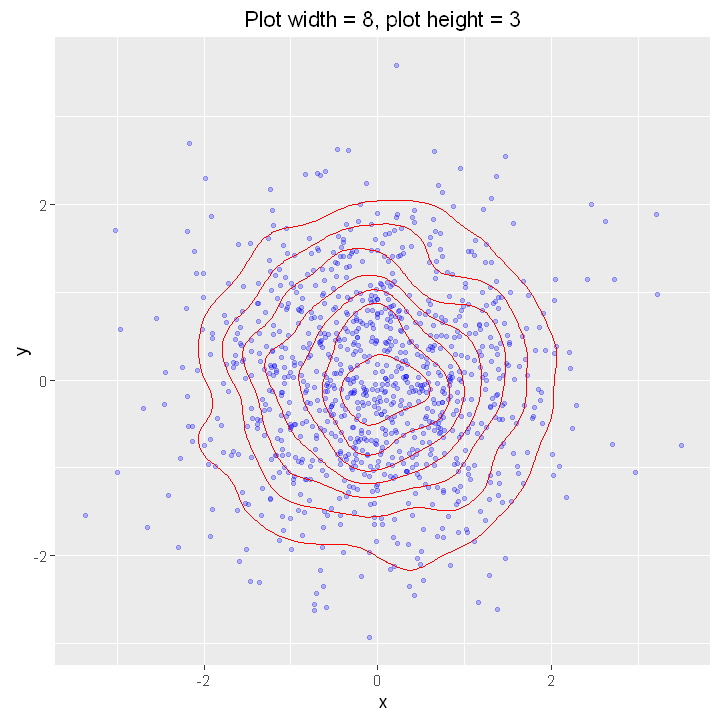

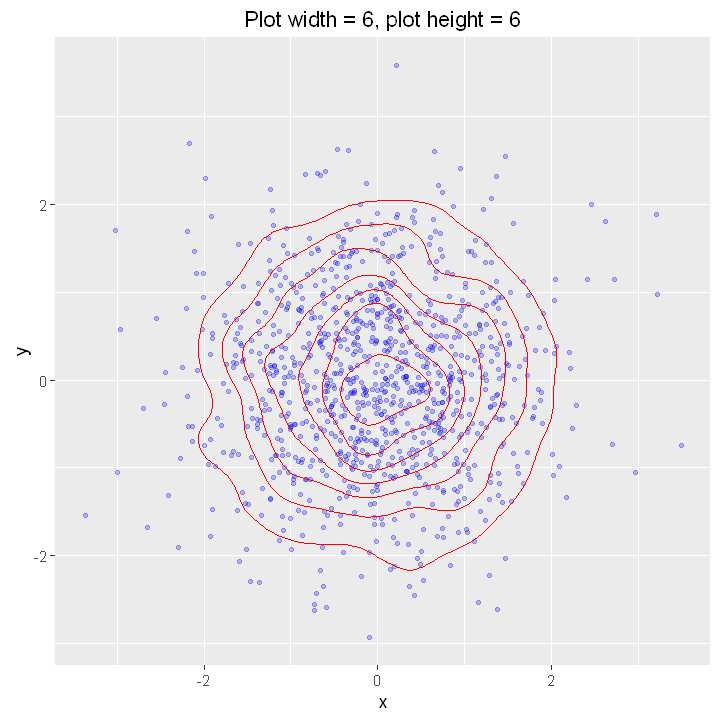

In [7]:
options(repr.plot.width = 8, repr.plot.height = 3)
p + ggtitle(sprintf(
    "Plot width = %s, plot height = %s", 
    getOption("repr.plot.width"),
    getOption("repr.plot.height")
))


options(repr.plot.width = 6, repr.plot.height = 6)
p + ggtitle(sprintf(
    "Plot width = %s, plot height = %s", 
    getOption("repr.plot.width"),
    getOption("repr.plot.height")
))

As you can see, you can only change the plot size once per cell. To create plots of different size, put each plot in a different Jupyter cell.

---  
Created by a Microsoft Employee.  
Copyright (C) Microsoft. All Rights Reserved.